In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings(action='ignore')

# 폰트 경로 설정
font_path = "C:/Users/wnsgu/Desktop/고대/환경/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf"
# 폰트 등록
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumBarunGothic'

# OD 시각화

In [ ]:
OD_filtered=pd.read_csv("OD_filtered_1020.csv")

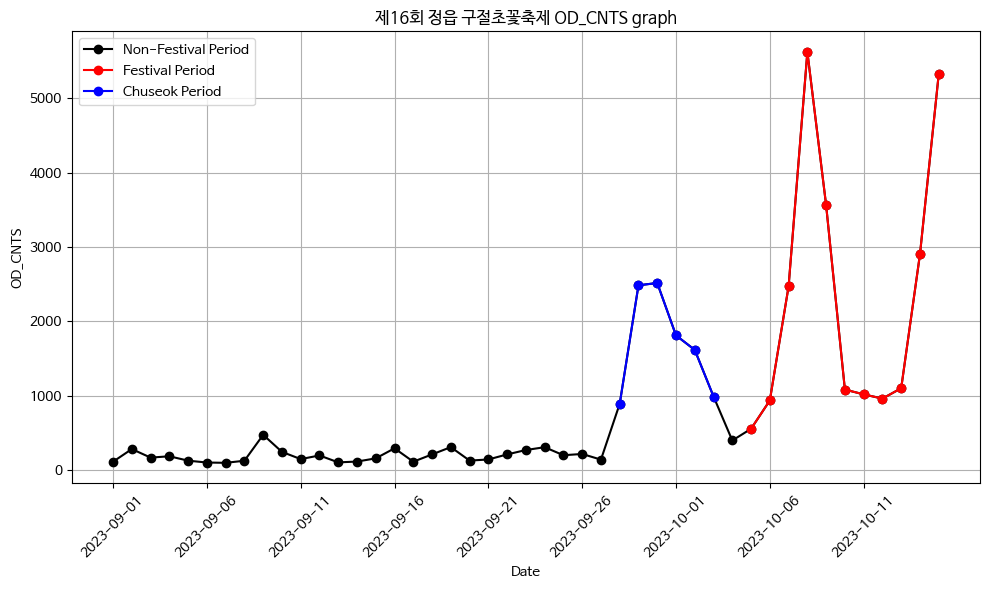

In [ ]:
def plot_od_cnts_by_festival(df, festival_name):
    # 특정 축제명으로 데이터 필터링
    festival_df = df[df['축제명'] == festival_name]
    festival_df['date'] = pd.to_datetime(festival_df['date'])  # date 열을 datetime으로 변환
    start_date = pd.to_datetime(festival_df['축제시작일자'].iloc[0])
    end_date = pd.to_datetime(festival_df['축제종료일자'].iloc[0])

    # 날짜별로 그룹화하여 od_cnts 합산
    grouped_df = festival_df.groupby('date')['od_cnts'].sum().reset_index()

    # 축제 기간
    in_festival = grouped_df[(grouped_df['date'] >= start_date) & (grouped_df['date'] <= end_date)]
    out_festival = grouped_df[(grouped_df['date'] < start_date) | (grouped_df['date'] > end_date)]

    # 추석 기간 설정 (추석 기간도 datetime 형식으로 설정)
    chuseok_start = pd.Timestamp('2023-09-28')
    chuseok_end = pd.Timestamp('2023-10-03')

    chuseok_period = grouped_df[(grouped_df['date'] >= chuseok_start) & (grouped_df['date'] <= chuseok_end)]


    plt.figure(figsize=(10, 6))

    # 전체 기간 그래프 (비축제 기간)
    plt.plot(grouped_df['date'], grouped_df['od_cnts'], marker='o', linestyle='-', color='black', label='Non-Festival Period')

    # 축제 기간 그래프
    plt.plot(in_festival['date'], in_festival['od_cnts'], marker='o', linestyle='-', color='r', label='Festival Period')

    # 추석 기간 그래프
    plt.plot(chuseok_period['date'], chuseok_period['od_cnts'], marker='o', linestyle='-', color='blue', label='Chuseok Period')

    # x축 눈금을 5일 간격으로 설정
    date_range = pd.date_range(start=grouped_df['date'].min(), end=grouped_df['date'].max(), freq='5D')
    plt.xticks(date_range, rotation=45)

    # 그래프 제목과 레이블 설정
    plt.title(f'{festival_name} OD_CNTS graph')
    plt.xlabel('Date')
    plt.ylabel('OD_CNTS')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_od_cnts_by_festival(OD_filtered, '제16회 정읍 구절초꽃축제')


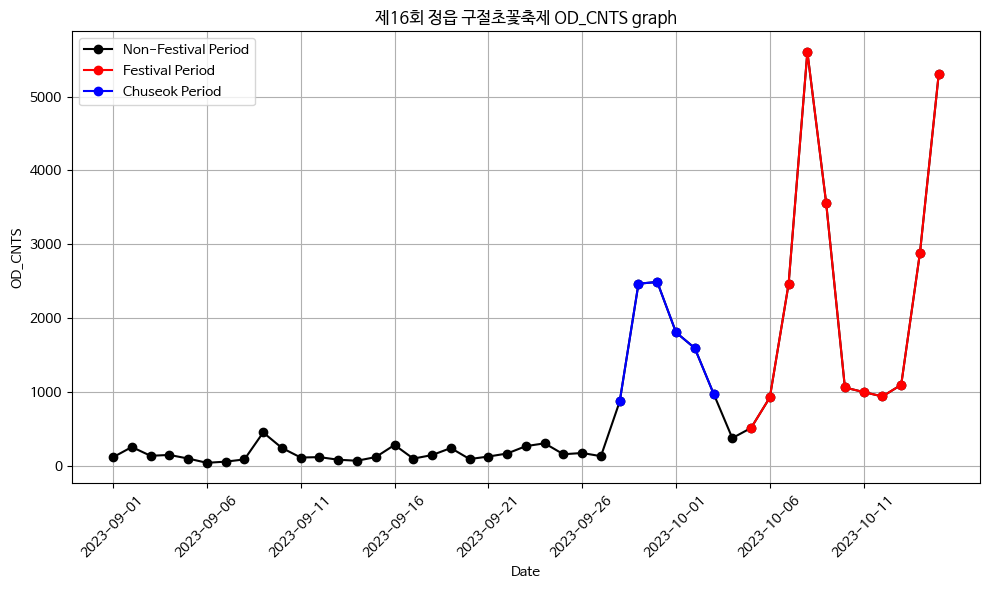

In [ ]:
# dest purpose 쇼핑, 기타, 여행만
def plot_od_cnts_by_festival2(df, festival_name):
    festival_df = df[df['축제명'] == festival_name]
    festival_df['date'] = pd.to_datetime(festival_df['date'])  # date 열을 datetime으로 변환
    start_date = pd.to_datetime(festival_df['축제시작일자'].iloc[0])
    end_date = pd.to_datetime(festival_df['축제종료일자'].iloc[0])

    # 날짜별로 그룹화하여 od_cnts 합산
    grouped_df = festival_df.groupby('date')['od_cnts'].sum().reset_index()

    # 축제 기간
    in_festival = grouped_df[(grouped_df['date'] >= start_date) & (grouped_df['date'] <= end_date)]
    out_festival = grouped_df[(grouped_df['date'] < start_date) | (grouped_df['date'] > end_date)]

    festival_df = festival_df[festival_df['dest_purpose'].isin([3, 4, 5])]

    # 날짜별로 그룹화하여 od_cnts 합산
    grouped_df = festival_df.groupby('date')['od_cnts'].sum().reset_index()

    in_festival = grouped_df[(grouped_df['date'] >= start_date) & (grouped_df['date'] <= end_date)]
    out_festival = grouped_df[(grouped_df['date'] < start_date) | (grouped_df['date'] > end_date)]

    # 추석 기간 설정 (추석 기간도 datetime 형식으로 설정)
    chuseok_start = pd.Timestamp('2023-09-28')
    chuseok_end = pd.Timestamp('2023-10-03')

    chuseok_period = grouped_df[(grouped_df['date'] >= chuseok_start) & (grouped_df['date'] <= chuseok_end)]


    plt.figure(figsize=(10, 6))

    # 전체 기간 그래프 (비축제 기간)
    plt.plot(grouped_df['date'], grouped_df['od_cnts'], marker='o', linestyle='-', color='black', label='Non-Festival Period')

    # 축제 기간 그래프
    plt.plot(in_festival['date'], in_festival['od_cnts'], marker='o', linestyle='-', color='r', label='Festival Period')

    # 추석 기간 그래프
    plt.plot(chuseok_period['date'], chuseok_period['od_cnts'], marker='o', linestyle='-', color='b', label='Chuseok Period')

    # x축 눈금을 5일 간격으로 설정
    date_range = pd.date_range(start=grouped_df['date'].min(), end=grouped_df['date'].max(), freq='5D')
    plt.xticks(date_range, rotation=45)

    # 그래프 제목과 레이블 설정
    plt.title(f'{festival_name} OD_CNTS graph')
    plt.xlabel('Date')
    plt.ylabel('OD_CNTS')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_od_cnts_by_festival2(OD_filtered, '제16회 정읍 구절초꽃축제')

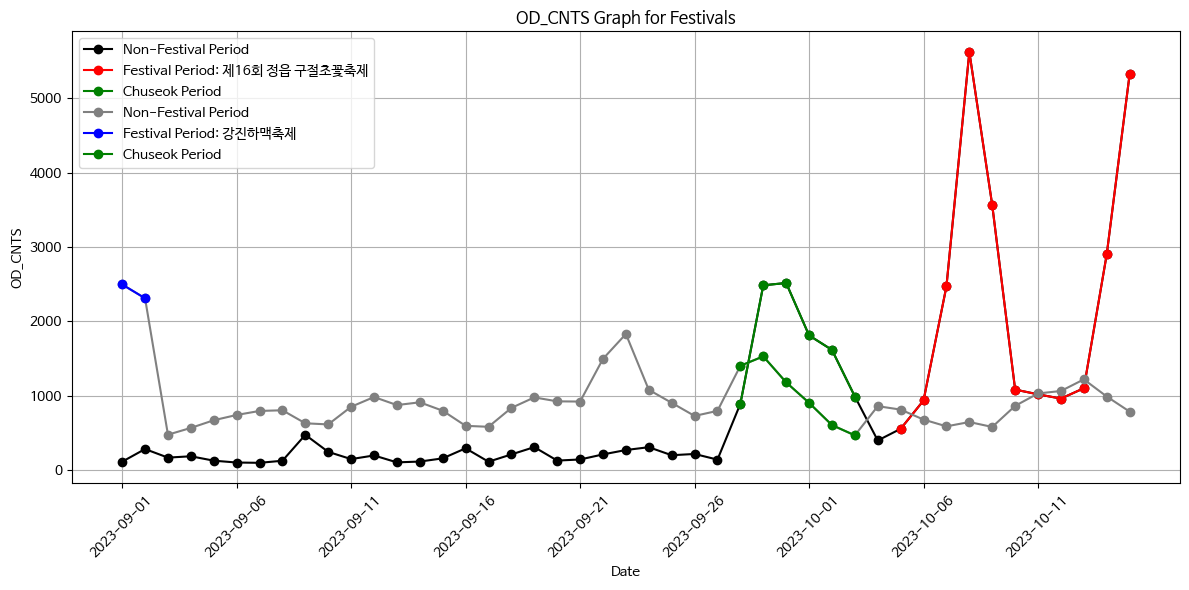

In [ ]:
# 두 개의 축제 교교
def plot_od_cnts_by_festivals(df, festival_names):
    plt.figure(figsize=(12, 6))  # 그래프 크기 설정

    # 추석 기간 설정
    chuseok_start = pd.Timestamp('2023-09-28')
    chuseok_end = pd.Timestamp('2023-10-03')

    # 각 축제에 대해 반복
    for i, festival_name in enumerate(festival_names):
        festival_df = df[df['축제명'] == festival_name]
        festival_df['date'] = pd.to_datetime(festival_df['date'])  # date 열을 datetime으로 변환
        start_date = pd.to_datetime(festival_df['축제시작일자'].iloc[0])
        end_date = pd.to_datetime(festival_df['축제종료일자'].iloc[0])

        # 날짜별로 그룹화하여 od_cnts 합산
        grouped_df = festival_df.groupby('date')['od_cnts'].sum().reset_index()


        color_non_festival = 'black' if i == 0 else 'gray'
        # 비축제 기간 그래프 (검정색)
        plt.plot(grouped_df['date'], grouped_df['od_cnts'], marker='o', linestyle='-', color=color_non_festival, label='Non-Festival Period')

        # 축제 기간 데이터 분리
        in_festival = grouped_df[(grouped_df['date'] >= start_date) & (grouped_df['date'] <= end_date)]

        # 축제 기간 그래프 (빨간색 또는 파란색으로 고정)
        color_festival = 'red' if i == 0 else 'blue'
        plt.plot(in_festival['date'], in_festival['od_cnts'], marker='o', linestyle='-', color=color_festival,
                 label=f'Festival Period: {festival_name}')

        # 추석 기간 그래프 (항상 초록색)
        chuseok_period = grouped_df[(grouped_df['date'] >= chuseok_start) & (grouped_df['date'] <= chuseok_end)]
        plt.plot(chuseok_period['date'], chuseok_period['od_cnts'], marker='o', linestyle='-', color='green', label='Chuseok Period')

    # x축 눈금을 5일 간격으로 설정
    date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='5D')
    plt.xticks(date_range, rotation=45)

    # 그래프 제목과 레이블 설정
    plt.title('OD_CNTS Graph for Festivals')
    plt.xlabel('Date')
    plt.ylabel('OD_CNTS')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 함수 호출 (축제명 목록 예시)
plot_od_cnts_by_festivals(OD_filtered, ['제16회 정읍 구절초꽃축제', '강진하맥축제'])


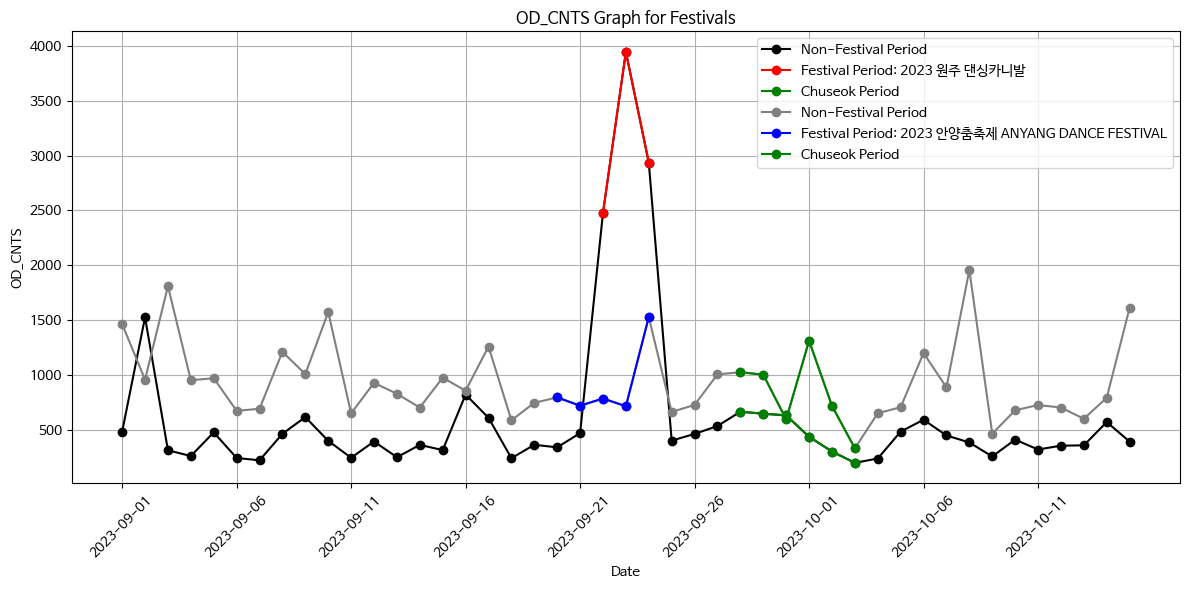

In [ ]:
# 두 개의 축제 비교 - 쇼핑, 기타, 여행만
def plot_od_cnts_by_festivals2(df, festival_names):
    plt.figure(figsize=(12, 6))  # 그래프 크기 설정

    # 추석 기간 설정
    chuseok_start = pd.Timestamp('2023-09-28')
    chuseok_end = pd.Timestamp('2023-10-03')

    # 각 축제에 대해 반복
    for i, festival_name in enumerate(festival_names):
        festival_df = df[df['축제명'] == festival_name]
        festival_df['date'] = pd.to_datetime(festival_df['date'])  # date 열을 datetime으로 변환
        start_date = pd.to_datetime(festival_df['축제시작일자'].iloc[0])
        end_date = pd.to_datetime(festival_df['축제종료일자'].iloc[0])

        festival_df = festival_df[festival_df['dest_purpose'].isin([3, 4, 5])]

        # 날짜별로 그룹화하여 od_cnts 합산
        grouped_df = festival_df.groupby('date')['od_cnts'].sum().reset_index()


        color_non_festival = 'black' if i == 0 else 'gray'
        # 비축제 기간 그래프 (검정색)
        plt.plot(grouped_df['date'], grouped_df['od_cnts'], marker='o', linestyle='-', color=color_non_festival, label='Non-Festival Period')

        # 축제 기간 데이터 분리
        in_festival = grouped_df[(grouped_df['date'] >= start_date) & (grouped_df['date'] <= end_date)]

        # 축제 기간 그래프 (빨간색 또는 파란색으로 고정)
        color_festival = 'red' if i == 0 else 'blue'
        plt.plot(in_festival['date'], in_festival['od_cnts'], marker='o', linestyle='-', color=color_festival,
                 label=f'Festival Period: {festival_name}')

        # 추석 기간 그래프 (항상 초록색)
        chuseok_period = grouped_df[(grouped_df['date'] >= chuseok_start) & (grouped_df['date'] <= chuseok_end)]
        plt.plot(chuseok_period['date'], chuseok_period['od_cnts'], marker='o', linestyle='-', color='green', label='Chuseok Period')

    # x축 눈금을 5일 간격으로 설정
    date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='5D')
    plt.xticks(date_range, rotation=45)

    # 그래프 제목과 레이블 설정
    plt.title('OD_CNTS Graph for Festivals')
    plt.xlabel('Date')
    plt.ylabel('OD_CNTS')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 함수 호출 (축제명 목록 예시)
plot_od_cnts_by_festivals2(OD_filtered, ['2023 원주 댄싱카니발', '2023 안양춤축제 ANYANG DANCE FESTIVAL'])


# Stay 시각화

In [ ]:
festival=pd.read_csv("축제.csv", encoding='cp949')
STAY_filtered=pd.read_csv("stay_filtered.csv")
STAY_filtered = pd.merge(STAY_filtered, festival, on = "hdong_cd")
STAY_filtered.drop(columns=['Unnamed: 0'], inplace=True)
STAY_filtered['date'] = pd.to_datetime(STAY_filtered['date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
STAY_festival= STAY_filtered[(STAY_filtered['date'] >= STAY_filtered['축제시작일자']) & (STAY_filtered['date'] <= STAY_filtered['축제종료일자'])]
STAY_non_festival = STAY_filtered[((STAY_filtered['date'] >= STAY_filtered['비교군시작일자']) & (STAY_filtered['date'] <= STAY_filtered['비교군종료일자']))
]
STAY_festival_grouped = STAY_festival.groupby(['축제명', 'date', 'time'], as_index=False).agg({
    'stay_cnts': 'sum'
})

STAY_non_festival_grouped = STAY_non_festival.groupby(['축제명','date', 'time'], as_index=False).agg({
    'stay_cnts': 'sum',
})
STAY_festival_grouped['datetime'] = pd.to_datetime(STAY_festival_grouped['date'] + ' ' + STAY_festival_grouped['time'])
STAY_non_festival_grouped['datetime'] = pd.to_datetime(STAY_non_festival_grouped['date'] + ' ' + STAY_non_festival_grouped['time'])
STAY_festival_grouped['date_index'] = STAY_festival_grouped.groupby('축제명')['date'].rank(method='dense').astype(int)
STAY_non_festival_grouped['date_index'] = STAY_non_festival_grouped.groupby('축제명')['date'].rank(method='dense').astype(int)
STAY_non_festival_grouped.rename(columns={'stay_cnts' : 'non_stay_cnts'}, inplace=True)
stay_final=STAY_festival_grouped.merge(STAY_non_festival_grouped[['축제명', 'time', 'non_stay_cnts', 'date_index']], on=['축제명', 'time', 'date_index'], how='inner')

In [ ]:
def plot_festival_comparison(df, festival_name):
    df = df.loc[df['축제명'] == festival_name]
    df = df.sort_values(by='datetime')

    # 그래프 그리기
    plt.figure(figsize=(12, 6))

    # 첫 번째 데이터프레임 플롯
    plt.plot(df['datetime'], df['stay_cnts'], color='red', label='festival Stay Counts')

    # 두 번째 데이터프레임 플롯
    plt.plot(df['datetime'], df['non_stay_cnts'], color='orange', label='non festival Stay Counts')

    # 제목 및 라벨 설정
    plt.title(f'Stay Counts Comparison')
    plt.xlabel('Time')
    plt.ylabel('Stay Counts')
    plt.title(f'{festival_name} STAY_CNTS graph')

    # x축 눈금 설정: 매 날짜의 특정 시간만 표시
    specific_times = pd.to_datetime(
        [f"{date} {hour}" for date in df['datetime'].dt.date.unique() for hour in ['08:00', '12:00', '16:00', '19:00', '23:00']]
    )
    plt.xticks(specific_times, [time.strftime('%H:%M') for time in specific_times], rotation=45, ha='right')  # 시간만 표시


    # x축 시간 정보 설정
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # x축 시간 포맷 설정

    # 범례 추가
    plt.legend()

    # 그래프 출력
    plt.tight_layout()
    plt.show()



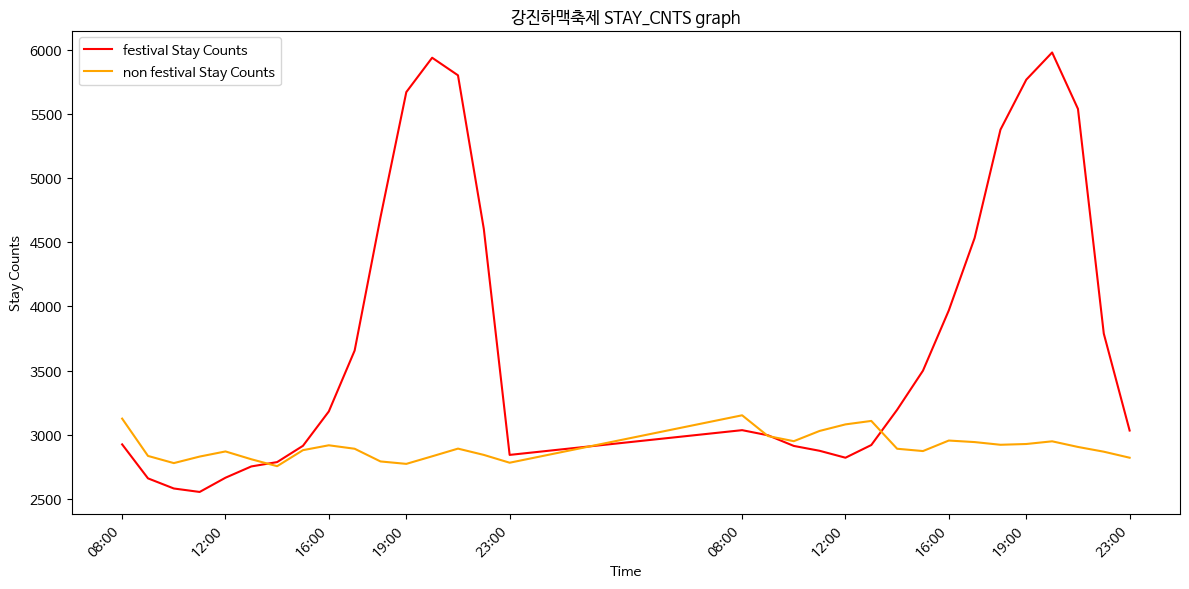

In [ ]:
plot_festival_comparison(stay_final, '강진하맥축제')

# 거리 기반

In [ ]:
OD_movement=pd.read_csv("OD_new_movement1021.csv")
dong=pd.read_csv("dong.csv")
festival_new2=pd.read_csv("festival_distance_1104.csv")

In [ ]:
OD_movement_new=OD_movement.merge(dong[['읍면동명', '행정동코드', '위도', '경도']], left_on='dest_hdong_cd', right_on='행정동코드', how='left')

In [ ]:
OD_movement_new.drop(columns=['행정동코드'], inplace=True)

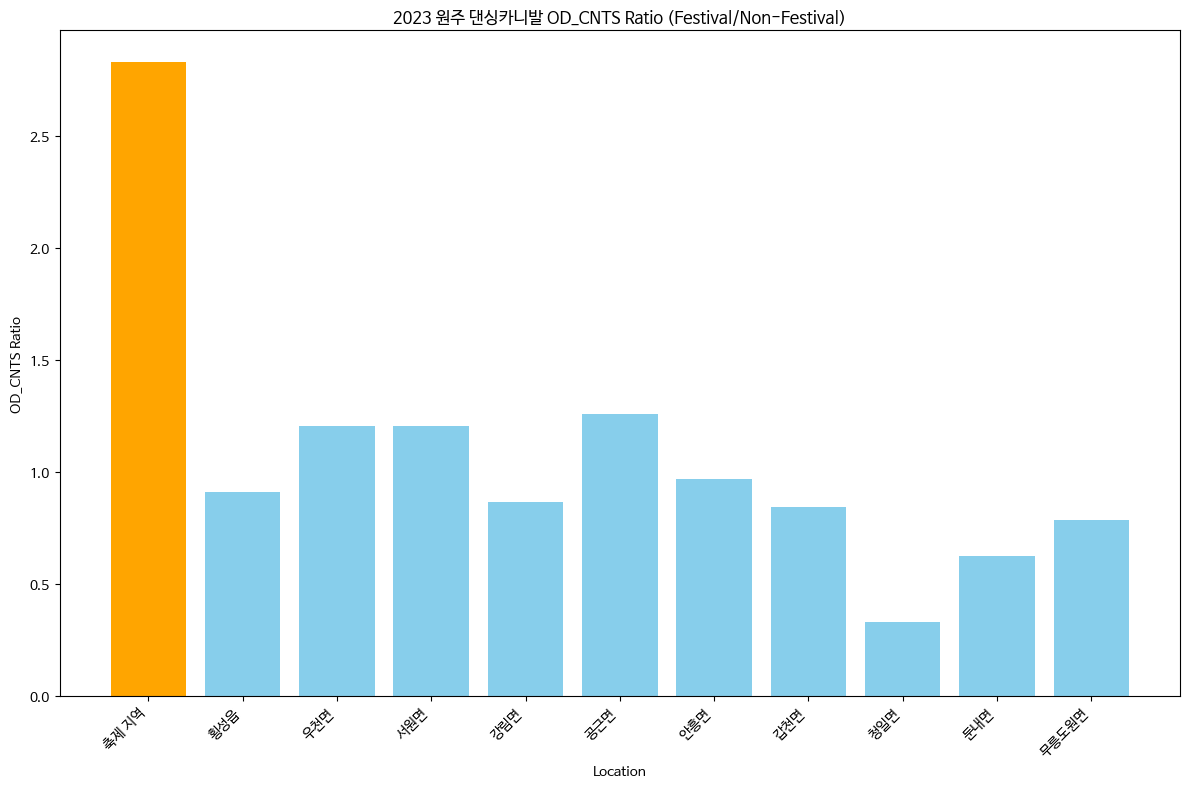

축제 지역의 비율: 2.83
축제 지역 순위: 1등


In [ ]:
def calculate_festival_od_ratio(OD_movement_new, festival_data, festival_name):

    OD_movement_new['dest_hdong_cd']=OD_movement_new['dest_hdong_cd'].astype(str)
    OD_movement_new['date'] = pd.to_datetime(OD_movement_new['date'], format='%Y%m%d', errors='coerce')

    # 1. 축제명에 맞는 축제 데이터를 필터링
    festival_df = festival_data[festival_data['축제명'] == festival_name].iloc[0]
    start_date = pd.to_datetime(festival_df['축제시작일자'])
    end_date = pd.to_datetime(festival_df['축제종료일자'])
    non_start_date = pd.to_datetime(festival_df['비교군시작일자'])
    non_end_date = pd.to_datetime(festival_df['비교군종료일자'])
    hdong_cd = str(festival_df['hdong_cd'])
    lat_festival = festival_df['위도']
    lon_festival = festival_df['경도']

    # 시도와 시군구 코드 추출
    sd_code = hdong_cd[:2]  # 시도 코드 (2자리)
    sgg_code = hdong_cd[2:5]  # 시군구 코드 (3자리)

    # 2. OD_movement_new에서 축제 장소와 일치하는 데이터 필터링 (축제 기간 / 비축제 기간)
    festival_period_data = OD_movement_new[(OD_movement_new['dest_hdong_cd'] == hdong_cd) &
                                           (OD_movement_new['date'] >= start_date) &
                                           (OD_movement_new['date'] <= end_date)]

    non_festival_period_data = OD_movement_new[(OD_movement_new['dest_hdong_cd'] == hdong_cd) &
                                               (OD_movement_new['date'] >= non_start_date) &
                                               (OD_movement_new['date'] <= non_end_date)]

    # 축제와 비축제 기간의 od_cnts 합
    od_cnts_festival_period = festival_period_data['od_cnts'].sum()
    od_cnts_non_festival_period = non_festival_period_data['od_cnts'].sum()

    # 3. 다른 시군구의 OD 데이터 필터링
    od_other_locations = OD_movement_new[(OD_movement_new['dest_hdong_cd'].str[:2] == sd_code) &
                                         (OD_movement_new['dest_hdong_cd'].str[2:5] != sgg_code)]

    od_other_locations = od_other_locations.dropna(subset=['위도', '경도'])

    unique_locations = od_other_locations[['dest_hdong_cd', '위도', '경도', '읍면동명']].drop_duplicates()

    # 4. 축제 장소와 가까운 상위 10개의 위치 찾기 (거리 계산)
    unique_locations['distance'] = unique_locations.apply(
        lambda x: np.sqrt((float(x['경도']) - lon_festival)**2 + (float(x['위도']) - lat_festival)**2)
        if pd.notnull(x['위도']) and pd.notnull(x['경도']) else float('inf'), axis=1
    )

    # 가까운 10개 위치 찾기
    od_nearest_10 = unique_locations.nsmallest(10, 'distance')

    # 5. 축제와 비축제 기간의 od_cnts 비율 계산 (11개 지역에 대해)
    results = []
    festival_ratio = od_cnts_festival_period / (od_cnts_non_festival_period if od_cnts_non_festival_period != 0 else 1)
    results.append({'location': '축제 지역', 'ratio': festival_ratio, '읍면동명': '축제 지역'})

    for idx, row in od_nearest_10.iterrows():
        loc_festival_period = OD_movement_new[(OD_movement_new['dest_hdong_cd'] == row['dest_hdong_cd']) &
                                              (OD_movement_new['date'] >= start_date) &
                                              (OD_movement_new['date'] <= end_date)]
        loc_non_festival_period = OD_movement_new[(OD_movement_new['dest_hdong_cd'] == row['dest_hdong_cd']) &
                                                 (OD_movement_new['date'] >= non_start_date) &
                                                 (OD_movement_new['date'] <= non_end_date)]

        loc_festival_cnts = loc_festival_period['od_cnts'].sum()
        loc_non_festival_cnts = loc_non_festival_period['od_cnts'].sum()

        loc_ratio = loc_festival_cnts / (loc_non_festival_cnts if loc_non_festival_cnts != 0 else np.nan)
        results.append({'location': row['dest_hdong_cd'], 'ratio': loc_ratio, '읍면동명': row['읍면동명']})

    result_df = pd.DataFrame(results)

    # 6. 결과를 그래프로 그리기 (축제 지역 포함 11개 지역, 축제 지역은 다른 색상으로)
    plt.figure(figsize=(12, 8))
    colors = ['skyblue' if loc != '축제 지역' else 'orange' for loc in result_df['location']]
    plt.bar(result_df['읍면동명'], result_df['ratio'], color=colors)
    plt.title(f'{festival_name} OD_CNTS Ratio (Festival/Non-Festival)')
    plt.xlabel('Location')
    plt.ylabel('OD_CNTS Ratio')
    plt.xticks(rotation=45, ha='right')  # x축 레이블이 겹치지 않게 회전
    plt.tight_layout()
    plt.show()

    # 축제 지역의 순위 출력
    festival_rank = result_df[result_df['location'] == '축제 지역'].index[0] + 1
    print(f"축제 지역의 비율: {festival_ratio:.2f}")
    print(f"축제 지역 순위: {festival_rank}등")

# 함수 호출 예시 (데이터셋과 축제명을 적절히 바꿔 사용)
calculate_festival_od_ratio(OD_movement_new, festival_new2, '2023 원주 댄싱카니발')


# OD 데이터 count 기준

In [ ]:
OD_mean_filtered=pd.read_csv("OD_mean_filtered.csv")
festival_new=pd.read_csv("final_extra.csv")

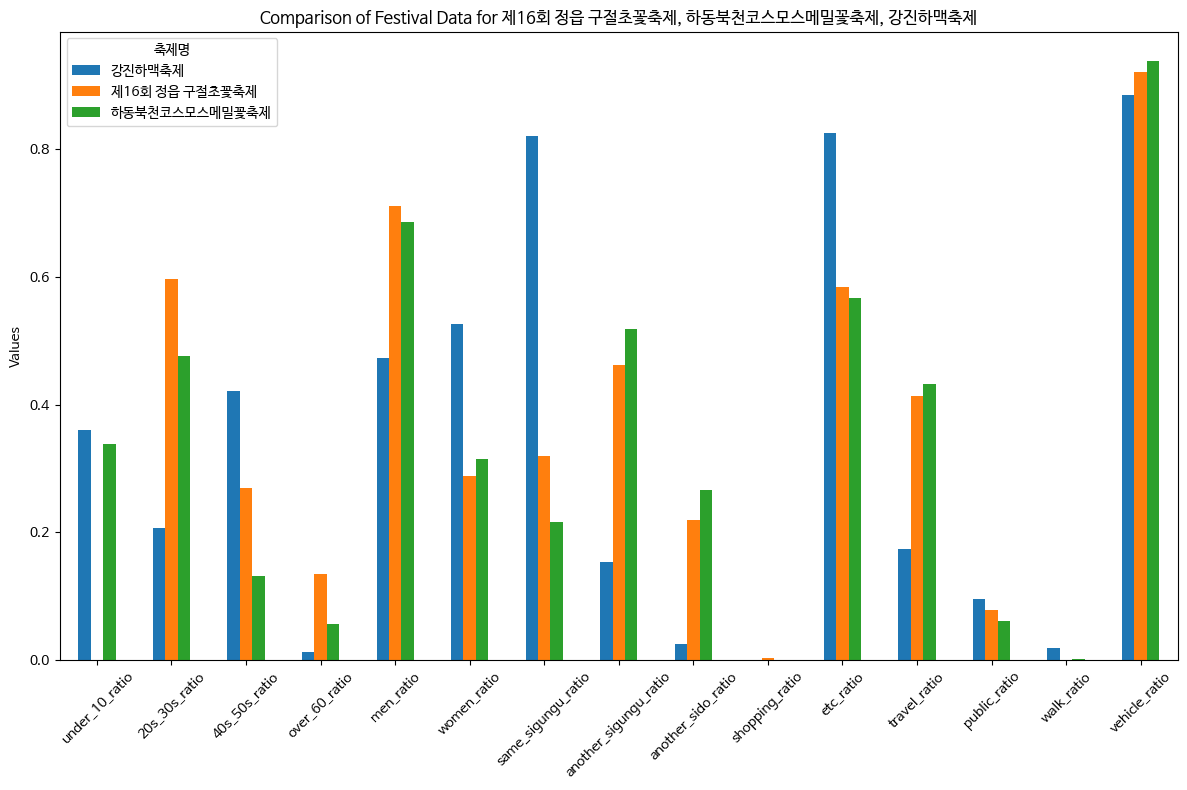

,축제명,od_cnts_mean,park_count,9월 시군구 지출액
0,강진하맥축제,1573.000000,0,1352234.0
1,제16회 정읍 구절초꽃축제,2303.909091,0,NaN
2,하동북천코스모스메밀꽃축제,2294.500000,1,1502074.0


In [ ]:
def compare_festivals(OD_mean_filtered, festival_new, festival_list):
    # Step 1: Extract relevant rows for the given festivals
    od_cnts_mean_festivals = OD_mean_filtered[OD_mean_filtered['축제명'].isin(festival_list)]
    festival_select = festival_new[festival_new['축제명'].isin(festival_list)]
    data=od_cnts_mean_festivals[['축제명', 'od_cnts_mean']].merge(festival_new[['축제명', 'park_count', '9월 시군구 지출액']], on='축제명', how='left')

    # Step 2: Drop 'od_cnts_mean' for visualization and '축제명' for grouping
    data_for_visualization = od_cnts_mean_festivals.drop(['od_cnts_mean'], axis=1)

    # Step 3: Set '축제명' as index to make plotting easier
    data_for_visualization.set_index('축제명', inplace=True)

    # Step 4: Transpose the data to have '축제명' as columns for comparison across multiple columns
    data_for_visualization_T = data_for_visualization.T

    # Step 5: Plot the comparison using a barplot for each column
    data_for_visualization_T.plot(kind='bar', figsize=(12, 8))

    plt.title(f'Comparison of Festival Data for {", ".join(festival_list)}')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend(title='축제명')
    plt.tight_layout()
    plt.show()

    return data

compare_festivals(OD_mean_filtered, festival_new, ['제16회 정읍 구절초꽃축제', '하동북천코스모스메밀꽃축제', '강진하맥축제'])

